# Exploratory Data Analysis (EDA) - Stock Forecasting Project


In [6]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [7]:
df = pd.read_csv('../data/AAPL.csv', skiprows=[1])
df.head()

,symbol,date,close,high,low,open,volume
0,AAPL,2000-01-03,0.842151,0.846382,0.765036,0.789017,535796800
1,AAPL,2000-01-04,0.771149,0.832276,0.761274,0.814408,512377600
2,AAPL,2000-01-05,0.782433,0.831806,0.774910,0.780553,778321600
3,AAPL,2000-01-06,0.714723,0.805003,0.714723,0.798421,767972800
4,AAPL,2000-01-07,0.748579,0.759864,0.718485,0.726008,460734400


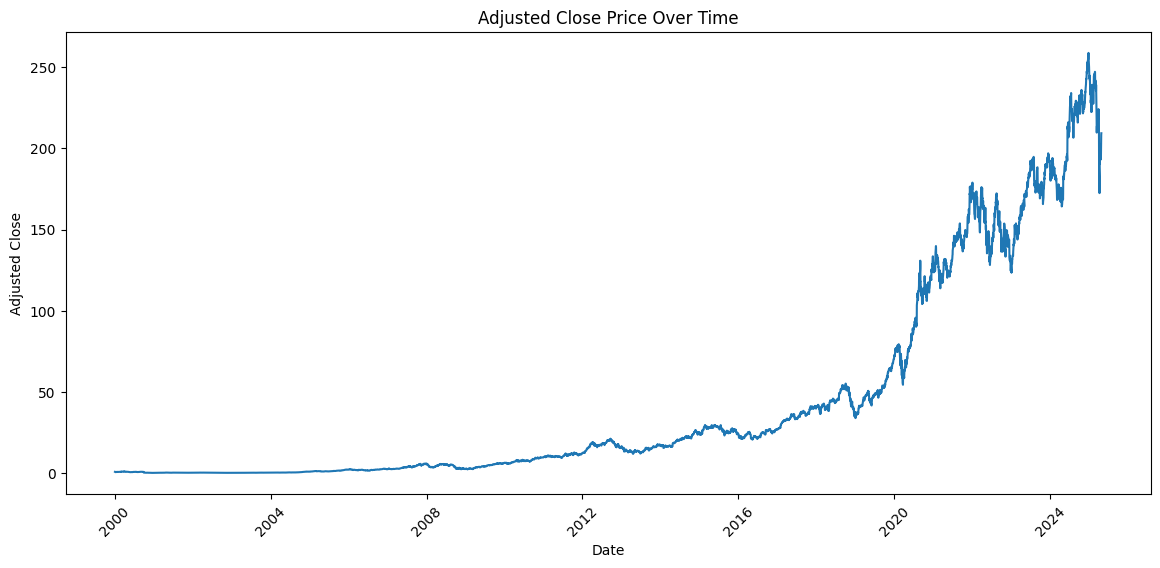

In [8]:
df['date'] = pd.to_datetime(df['date'])

# Plot closing prices
plt.figure(figsize=(14,6))
#plt.plot(df['date'], df['adj_close'])
plt.plot(df['date'], df['close'])
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.xticks(rotation=45)
plt.show()


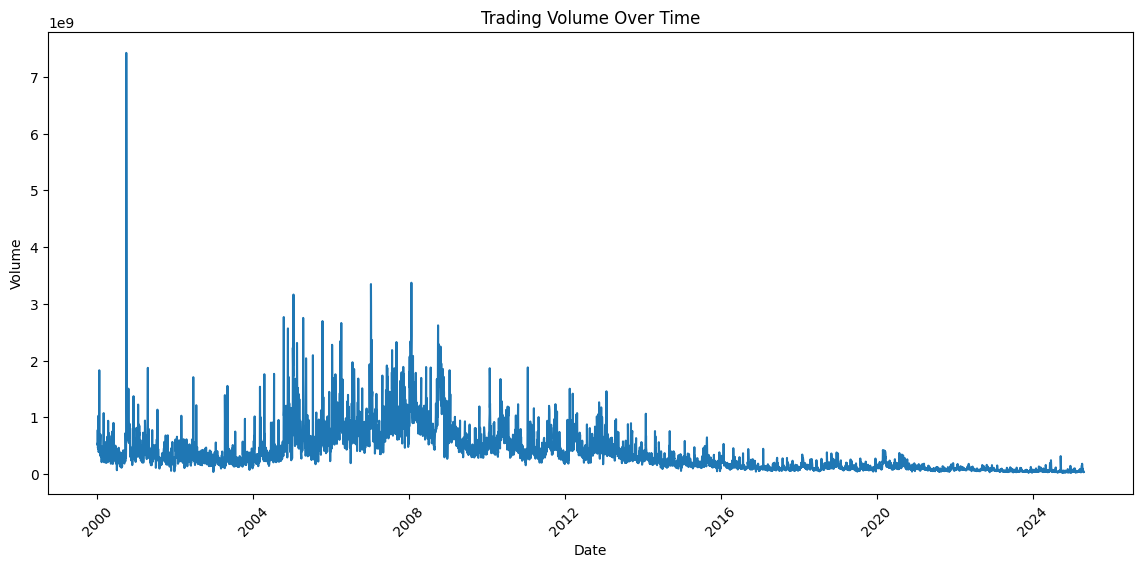

In [9]:
# Plot trading volume over time
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

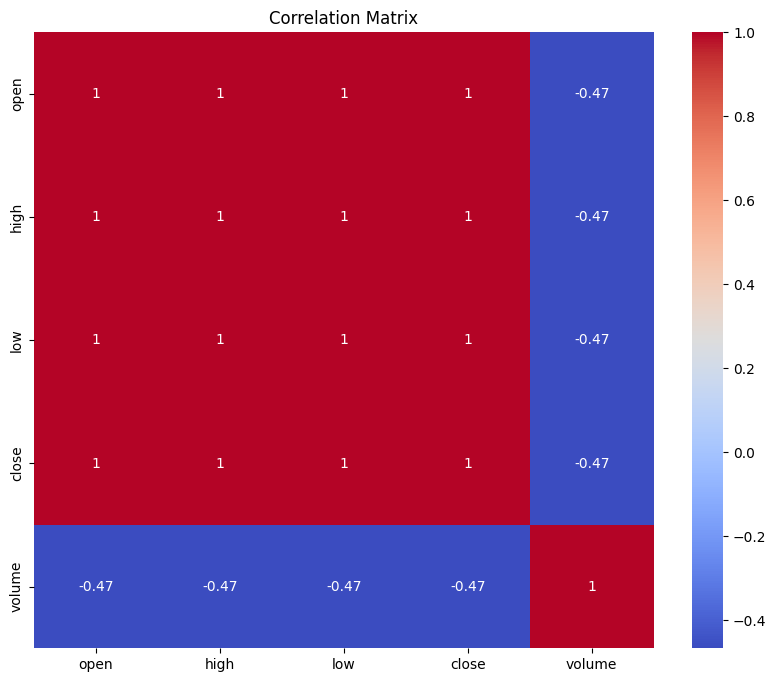

In [10]:
# Compute correlation matrix
corr_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

# Plot heatmap
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


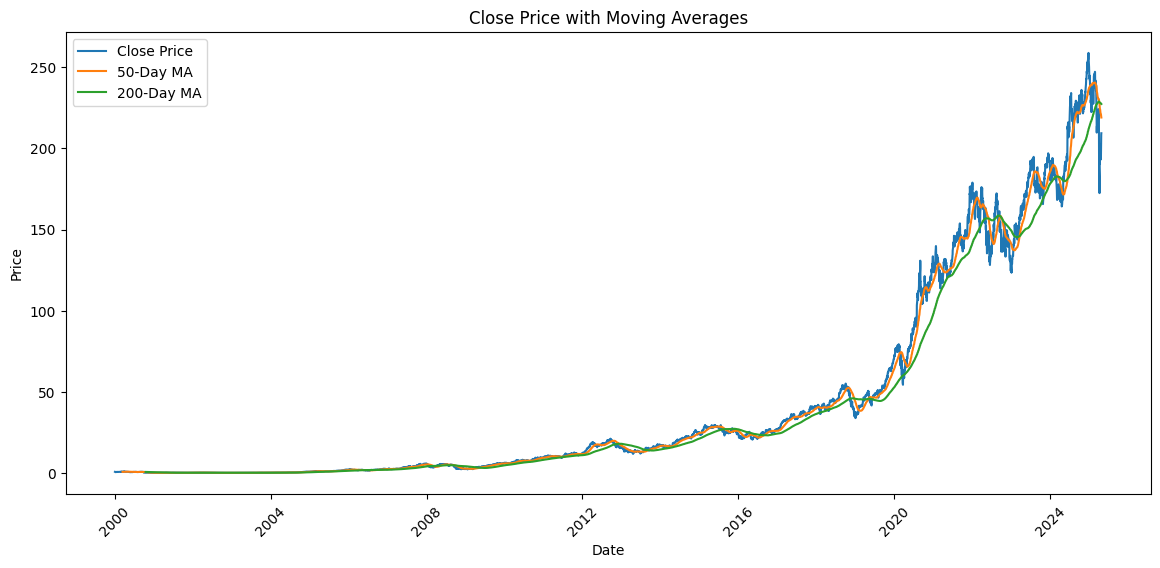

In [11]:
# Create 50-day and 200-day moving averages
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['MA50'], label='50-Day MA')
plt.plot(df['date'], df['MA200'], label='200-Day MA')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


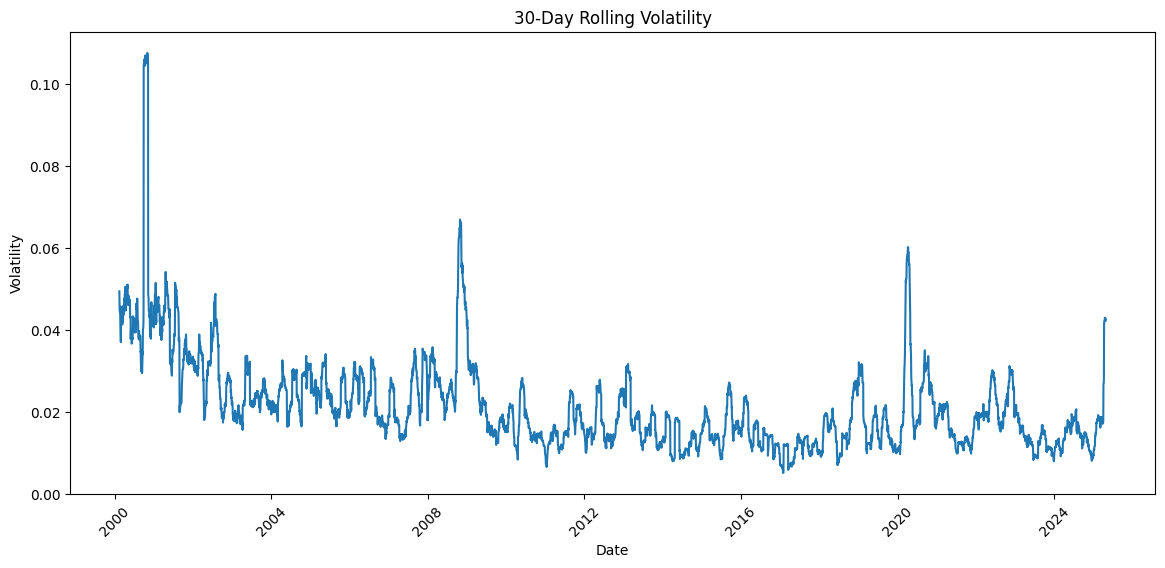

In [12]:
# Calculate daily returns
df['daily_return'] = df['close'].pct_change()

# Calculate rolling volatility (30 days)
df['volatility'] = df['daily_return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['volatility'])
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()
